https://arxiv.org/abs/2310.02956

# **Imports**

In [ ]:
!pip install lime shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=48a0ae6e1a10e47cc6d4a824ca3e5afd172f23339427938b42024f4d285ff51a
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import pandas as pd
import gdown  # to download data from google drive
import gzip   # to decompress downloaded data
import shutil

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import lightgbm as lgb

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import lime.lime_tabular
import shap

#**Load and Split dataset**

In [ ]:
def download_data(folder_id):
    url = f"https://drive.google.com/drive/folders/{folder_id}"
    # gdown URL formate
    gdown.download_folder(url=url, output="./downloaded_folder", quiet=False, use_cookies=False)

In [ ]:
def decompress_gz(file_path, output_file_name):
    with gzip.open(file_path, 'rb') as f_in:
        with open(output_file_name, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

In [ ]:
if __name__ == '__main__':
    # downloading raw dataset
    download_data("14ZG8utOf0Ry76w_T9rqrk5kdhhPIK84P")
    decompress_gz('/content/downloaded_folder/accepted_2007_to_2018Q4.csv.gz', "accepted.csv")

Retrieving folder contents


Processing file 1thyWynkaoLHijDDfSxD_SEWSbOMONvai accepted_2007_to_2018Q4.csv.gz
Retrieving folder 1UGhBnl-1KamEMI_jeSrYZC6Zp7HtmTKf extras
Processing file 1S-aQezZ35nOVke49jPKCJu6bLnePD9P8 decision_tree.png
Processing file 13NX762lSljrdO6XIinOrM7gdjS0pSuAB ROC curve Log_Reg.jpg
Processing file 1lLc7u5ghmcZowpJhr58MMWNVMywVj7wA Learning Curve Log_Reg.jpg
Processing file 1uj6RpBJ_AphY9647eOkCBPzrQvw9K4la Log_Reg Interpretability.jpg
Processing file 1nnwa05ycQ2vbsmy_0S7QpdZdPNTtZiIV Important features .png
Processing file 14ZTvA-J_R4_rrAqN60ffb9WT20fjdO-T Residual Plot Log_Reg.jpg
Processing file 1G10InrGbyxf3J-M1DEbd2aeOdzBEhUCA Learning Curve Random Forest.jpg
Processing file 1Rkf__uZbEm8ywaZ5ZdZXtknrPDeoH9KU confusion matrices.png
Processing file 1wguiykC7WAYTGdi4Fud_De0FqtKqeV6W ROC Curves for SVM Models.png
Processing file 1JU4u7cqAOOqRtEuLu9ds5wpUzXGpFymE LightGBM feature importance(gain).png
Processing file 1vNChxKWrRgFw39_fpungumqB-Sp4Yh19 ROC-AUC vs K.png
Processing file 1TcM7nn

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1thyWynkaoLHijDDfSxD_SEWSbOMONvai
From (redirected): https://drive.google.com/uc?id=1thyWynkaoLHijDDfSxD_SEWSbOMONvai&confirm=t&uuid=e79a36c8-ee74-4c12-98a6-5034a78041ac
To: /content/downloaded_folder/accepted_2007_to_2018Q4.csv.gz
100%|██████████| 393M/393M [00:05<00:00, 68.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1S-aQezZ35nOVke49jPKCJu6bLnePD9P8
To: /content/downloaded_folder/extras/decision_tree.png
100%|██████████| 292k/292k [00:00<00:00, 5.66MB/s]
Downloading...
From: https://drive.google.com/uc?id=13NX762lSljrdO6XIinOrM7gdjS0pSuAB
To: /content/downloaded_folder/extras/ROC curve Log_Reg.jpg
100%|██████████| 34.2k/34.2k [00:00<00:00, 33.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lLc7u5ghmcZowpJhr58MMWNVMywVj7wA
To: /content/downloaded_folder/extras/Learning Curve Log_Reg.jpg
100%|█

In [ ]:
data = pd.read_csv("/content/downloaded_folder/df_cleaned.csv", low_memory=False)
data.head()

,last_pymnt_d,total_rec_prncp,last_pymnt_amnt,out_prncp,total_rec_late_fee,last_fico_range_high,installment,loan_amnt,total_rec_int,out_prncp_inv,...,funded_amnt_inv,recoveries,debt_settlement_flag,hardship_flag,mo_sin_old_rev_tl_op,revol_util,dti,all_util,annual_inc,loan_status
0,17,-0.332581,-0.372797,0.420080,-0.261895,0.281611,-0.473027,-0.461473,0.413942,0.420298,...,-0.461004,-0.445598,0,0,-0.307356,0.608376,0.558953,0.915820,-1.203816,0
1,31,-0.840560,-0.473603,-0.629220,-0.261895,1.244049,-1.608631,-1.601510,-1.081823,-0.629167,...,-1.601271,-0.445598,0,0,-0.187187,-1.880835,-1.233491,-0.049124,0.274631,1
2,27,-0.250720,-0.222228,2.263937,-0.261895,0.883135,1.252073,1.058575,-0.380182,2.264445,...,1.059353,-0.445598,0,0,-0.980297,0.431193,-0.223328,0.379740,2.227297,1
3,39,-0.458023,0.161605,-0.629220,-0.261895,0.161306,-1.364264,-1.373503,-0.909433,-0.629167,...,-1.373218,-0.445598,0,0,-1.472987,0.314511,-0.337836,0.433348,-1.231711,1
4,5,-0.415519,0.220569,-0.629220,-0.261895,0.221459,-1.317547,-1.348168,-0.834440,-0.629167,...,-1.347878,-0.445598,0,0,0.738107,1.273894,0.117928,1.559116,-0.841178,1


In [ ]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **LightGBM**

## **Model Arch**

In [ ]:
def LightGbm_model(X_train, y_train, X_test, y_test):
    """
    Train a LightGBM model with given training data and validate on test data.

    Parameters:
    X_train (array-like): Training features
    y_train (array-like): Training labels
    X_test (array-like): Test features
    y_test (array-like): Test labels

    Returns:
    lgb.Booster: Trained LightGBM model
    """
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    params = {
        'learning_rate': 0.1,
        'n_estimators': 100,
        'max_depth': 9,
        'bagging_fraction': 0.8,
        'feature_fraction': 0.5,
        'bagging_freq': 6,
        'min_child_weight': 0.0005,
        'min_child_samples': 15,
        'num_leaves': 360,
        'reg_lambda': 0,
        'reg_alpha': 0,
        'objective': 'binary',
        'metric': 'auc',
        'seed': 42,
        'verbose': -1
    }

    model = lgb.train(
        params,
        train_data,
        num_boost_round=params['n_estimators'],
        valid_sets=[train_data, valid_data],
        valid_names=['train', 'valid'],
        callbacks=[
            lgb.early_stopping(stopping_rounds=20),
            lgb.log_evaluation(10)
        ]
    )
    return model



In [ ]:
from lightgbm import LGBMClassifier

def LightGbm_model(X_train, y_train, X_test, y_test):
    """
    Train a LightGBM model with given training data and validate on test data.

    Parameters:
    X_train (array-like): Training features
    y_train (array-like): Training labels
    X_test (array-like): Test features
    y_test (array-like): Test labels

    Returns:
    lgb.Booster: Trained LightGBM model
    """

    # Initialize LGBMClassifier with the same parameters
    model = LGBMClassifier(
        learning_rate=0.1,
        n_estimators=100,
        max_depth=9,
        bagging_fraction=0.8,
        feature_fraction=0.5,
        bagging_freq=6,
        min_child_weight=0.0005,
        min_child_samples=15,
        num_leaves=360,
        reg_lambda=0,
        reg_alpha=0,
        objective='binary',
        metric='auc',
        seed=42,
        verbose=-1
    )

    # Fit the model
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_names=['train', 'valid'],
        callbacks=[
            lgb.early_stopping(stopping_rounds=20),
            lgb.log_evaluation(10)
        ]
    )
    return model

In [ ]:
model = LightGbm_model(X_train, y_train, X_test, y_test)

y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

Training until validation scores don't improve for 20 rounds
[10]	train's auc: 0.998235	valid's auc: 0.997803
[20]	train's auc: 0.999298	valid's auc: 0.998946
[30]	train's auc: 0.99951	valid's auc: 0.999075
[40]	train's auc: 0.999669	valid's auc: 0.999225
[50]	train's auc: 0.999759	valid's auc: 0.999313
[60]	train's auc: 0.999862	valid's auc: 0.999308
[70]	train's auc: 0.99991	valid's auc: 0.999339
[80]	train's auc: 0.999951	valid's auc: 0.99935
[90]	train's auc: 0.999972	valid's auc: 0.999346
Early stopping, best iteration is:
[72]	train's auc: 0.999917	valid's auc: 0.999355


## **Model Evaluation**

ROC-AUC Score: 0.9902


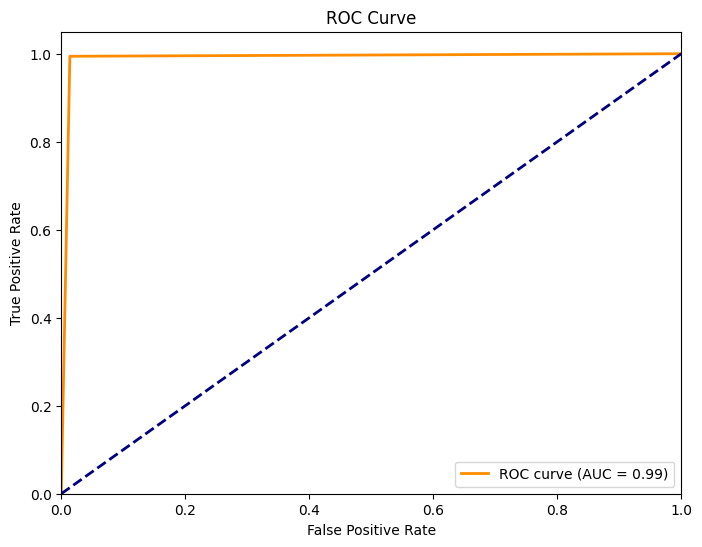


Accuracy: 0.9903

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11549
           1       0.99      0.99      0.99     12309

    accuracy                           0.99     23858
   macro avg       0.99      0.99      0.99     23858
weighted avg       0.99      0.99      0.99     23858



In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

## **Model Explainability**

### Feature Importance

<Figure size 1200x600 with 0 Axes>

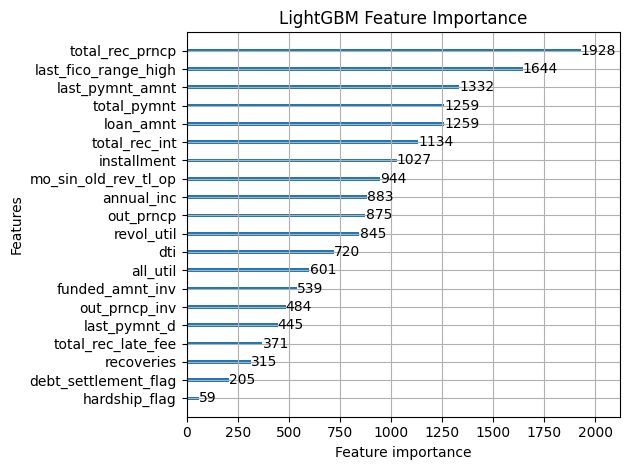

In [ ]:
plt.figure(figsize=(12, 6))
lgb.plot_importance(model, max_num_features=20)
plt.title('LightGBM Feature Importance')
plt.tight_layout()
plt.show()

- Importance is based on how many times a feature was used to split.
- To see how often features are used.

<Figure size 1000x600 with 0 Axes>

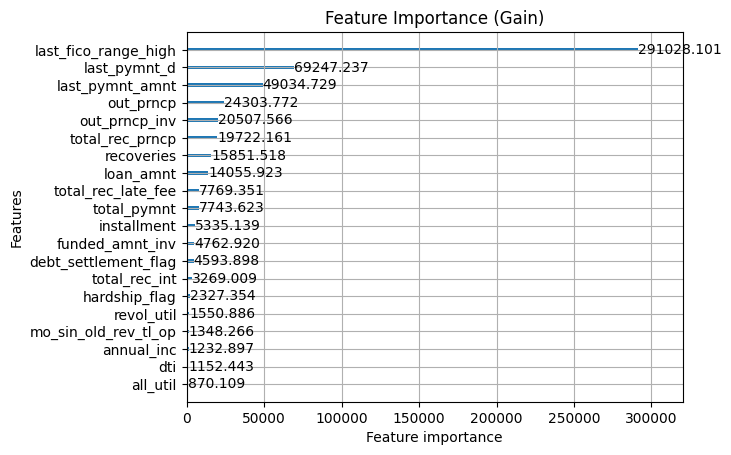

In [ ]:
plt.figure(figsize=(10, 6))
lgb.plot_importance(model, importance_type='gain', max_num_features=20)
plt.title('Feature Importance (Gain)')
plt.show()

- Importance is based on the total information gain a feature contributes.
- To know which features have more influence.

In [20]:
importance_gain = model.booster_.feature_importance(importance_type='gain')
feature_names = model.booster_.feature_name()

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance_gain': importance_gain
})

top_10_features = importance_df.sort_values(by='importance_gain', ascending=False).head(10)

print(top_10_features)

                 feature  importance_gain
5   last_fico_range_high    291028.100927
0           last_pymnt_d     69247.237375
2        last_pymnt_amnt     49034.729450
3              out_prncp     24303.771676
9          out_prncp_inv     20507.565555
1        total_rec_prncp     19722.160770
12            recoveries     15851.517871
7              loan_amnt     14055.923304
4     total_rec_late_fee      7769.350720
10           total_pymnt      7743.622553


### PDP

In [28]:
top_feature = top_10_features.iloc[0]['feature']
top_feature

'last_fico_range_high'

<ipython-input-29-4bc0af19689a>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


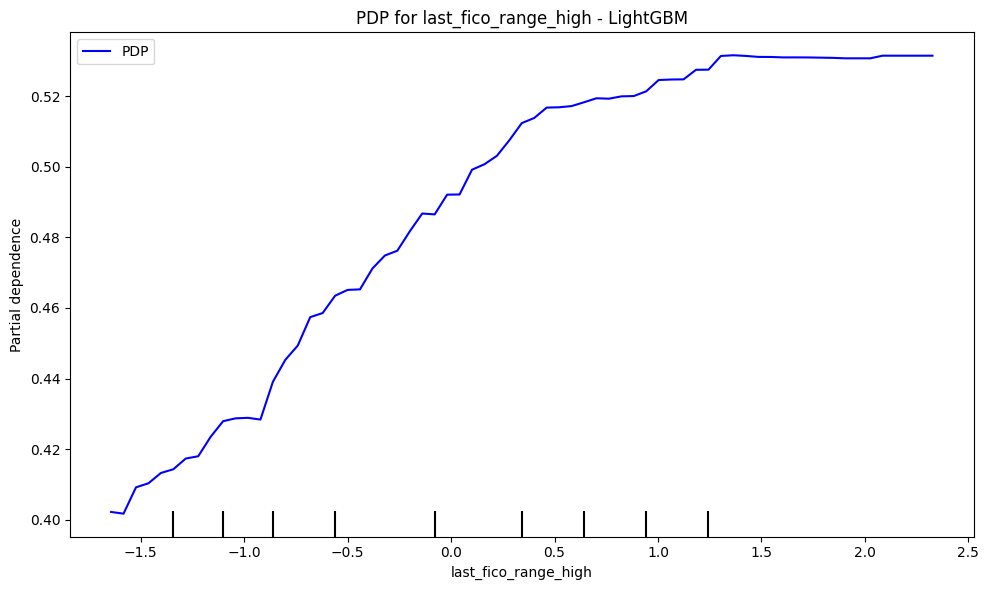

In [29]:
sample_indices = np.random.choice(X_test.shape[0], size=1000, replace=False)
X_test_sample = X_test.iloc[sample_indices]

fig, ax = plt.subplots(figsize=(10, 6))

PartialDependenceDisplay.from_estimator(
    model,
    X_test_sample,
    [top_feature],
    ax=ax,
    feature_names=X.columns,
    kind='average',
    line_kw={"color": "blue", "label": "PDP"}
)

ax.set_title(f'PDP for {top_feature} - LightGBM')
ax.legend()
plt.tight_layout()
plt.show()

### ICE

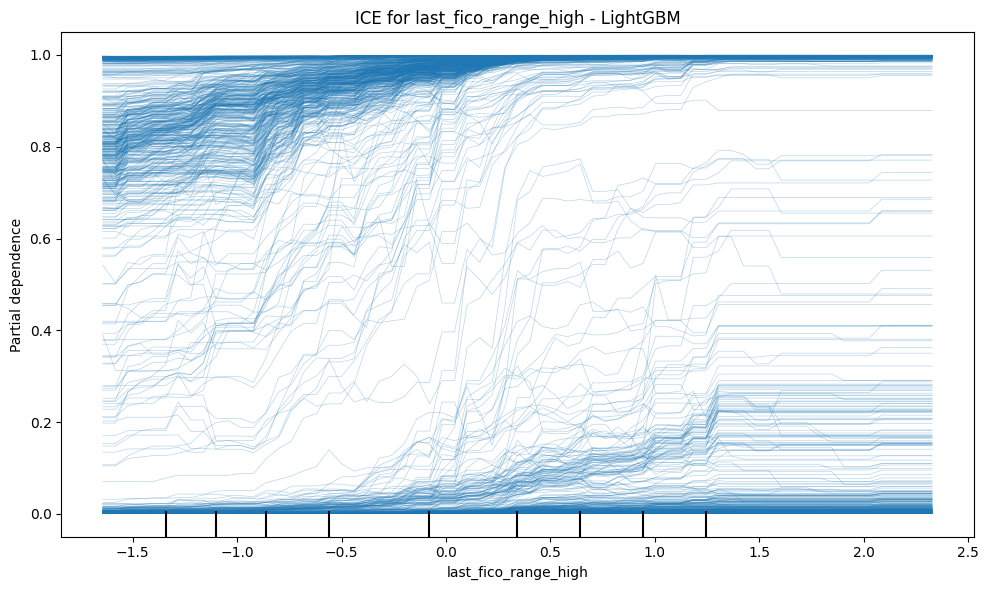

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
display = PartialDependenceDisplay.from_estimator(
    model,
    X_test_sample,
    [top_feature],
    ax=ax,
    feature_names=X.columns,
    kind='individual',
)


ax.set_title(f'ICE for {top_feature} - LightGBM')
plt.tight_layout()
plt.show()


### SHAP

100%|===================| 23805/23858 [04:11<00:00]       

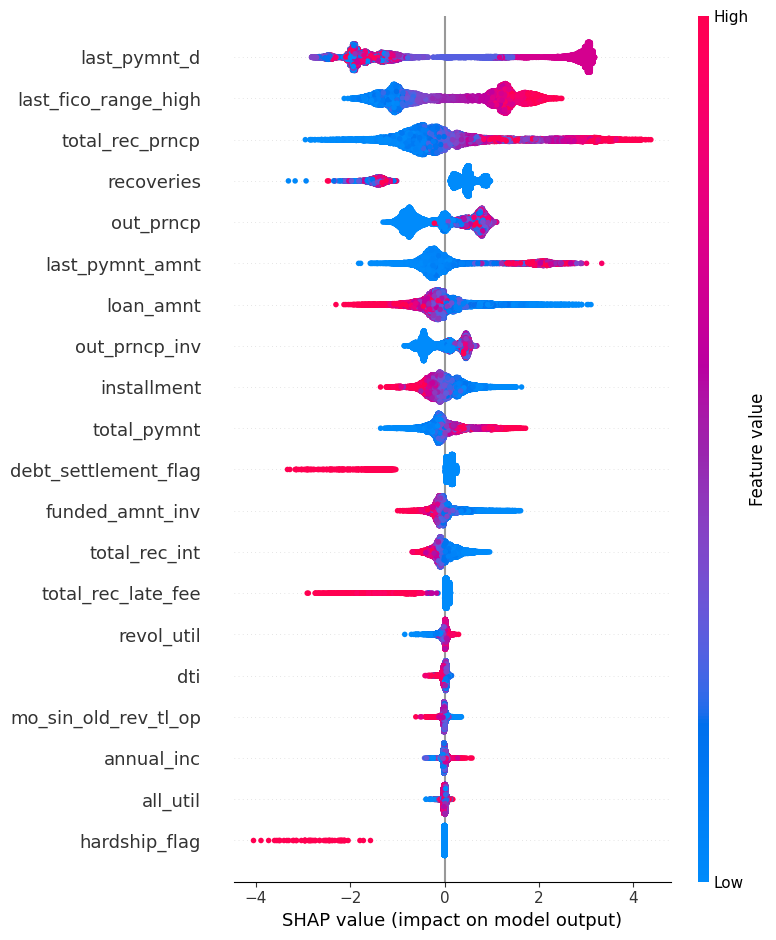

In [40]:
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test, check_additivity=False)

shap.summary_plot(shap_values, X_test)

**last_pymnt_d** is the most impactful feature: The more recent the last payment, the more likely the model is predicting a positive outcome.




### LIME

In [41]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['Approved', 'Not Approved'],
    mode='classification'
)

# LightGBM returns probabilities for class 1 only in binary classification
# So we need to wrap it to return both class 0 and class 1
def predict_proba_wrapper(data):
    proba_class1 = model.predict(data)  # returns only class 1 prob
    proba_class0 = 1 - proba_class1
    return np.vstack((proba_class0, proba_class1)).T


exp = explainer.explain_instance(
    data_row=X_test.iloc[0].values,
    predict_fn=predict_proba_wrapper,
    num_features=10
)

exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
